In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv('supply_chain_data.csv')

# Display the first few rows of the dataset
data.head()

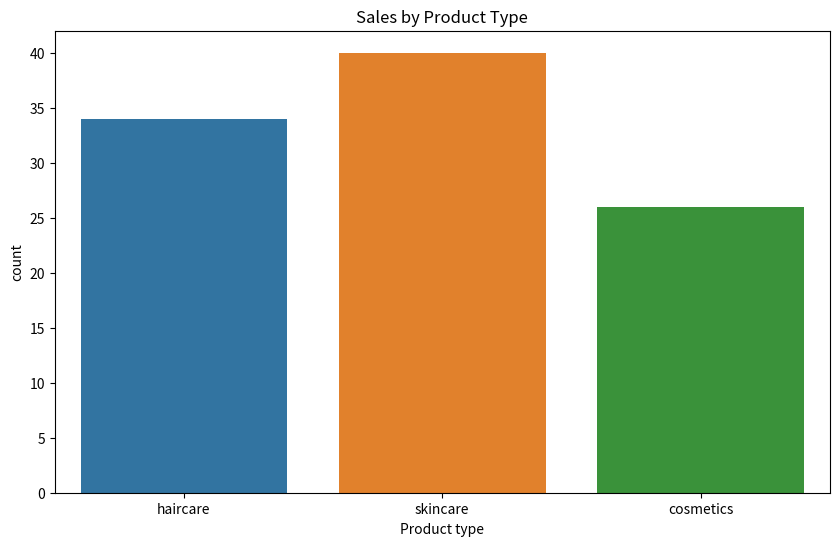

In [ ]:
# Sales by product type
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Product type')
plt.title('Sales by Product Type')
plt.show()

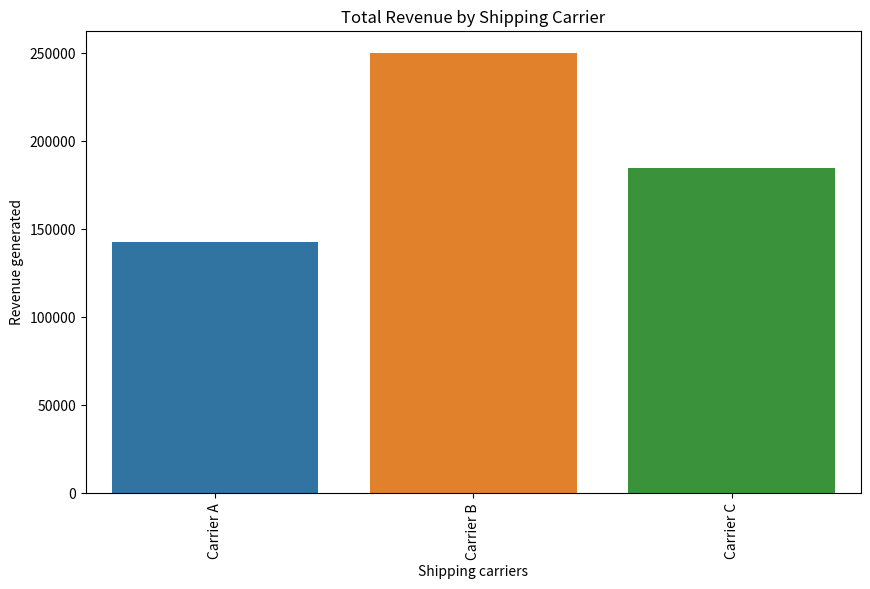

In [ ]:
# Total revenue by shipping carrier
carrier_revenue = data.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=carrier_revenue, x='Shipping carriers', y='Revenue generated')
plt.title('Total Revenue by Shipping Carrier')
plt.xticks(rotation=90)
plt.show()

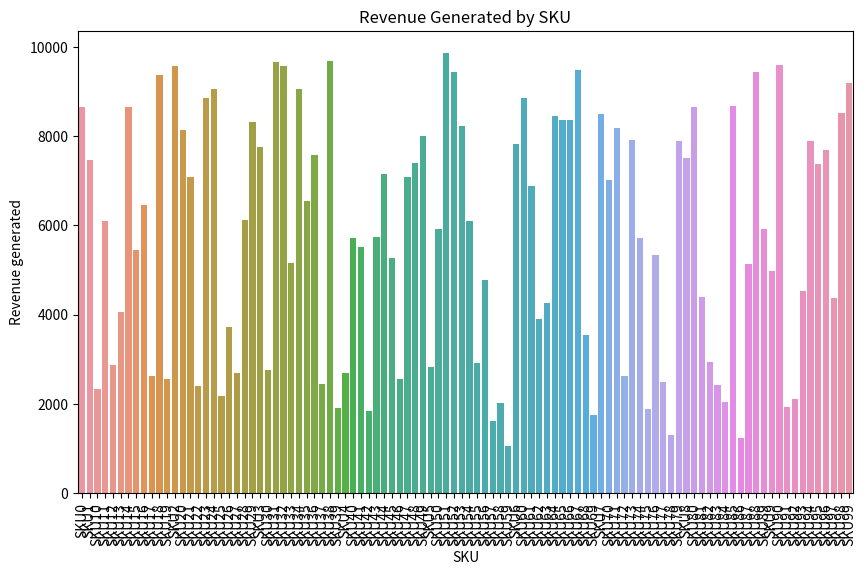

In [ ]:
# Revenue generated by SKU
sku_revenue = data.groupby('SKU')['Revenue generated'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=sku_revenue, x='SKU', y='Revenue generated')
plt.title('Revenue Generated by SKU')
plt.xticks(rotation=90)
plt.show()

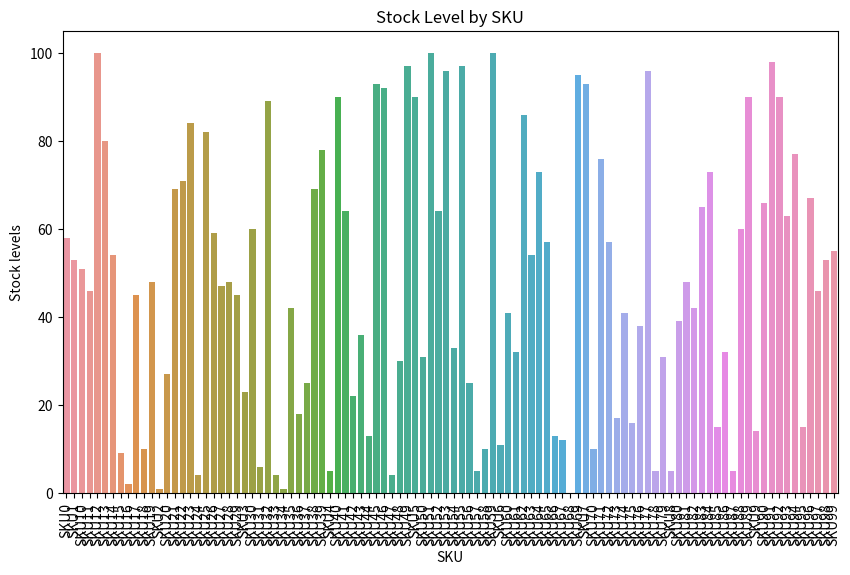

In [ ]:
# Stock level by SKU
sku_stock = data.groupby('SKU')['Stock levels'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=sku_stock, x='SKU', y='Stock levels')
plt.title('Stock Level by SKU')
plt.xticks(rotation=90)
plt.show()

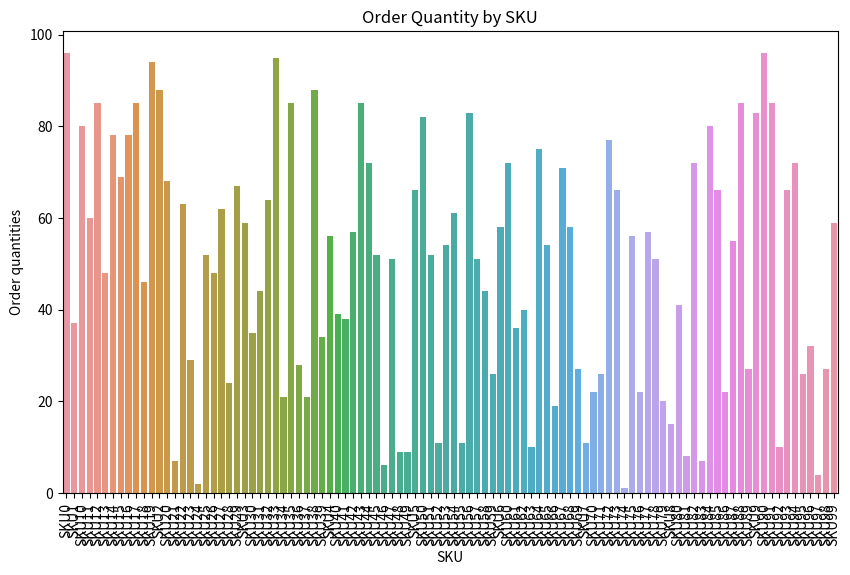

In [ ]:
# Order quantity by SKU
sku_order = data.groupby('SKU')['Order quantities'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=sku_order, x='SKU', y='Order quantities')
plt.title('Order Quantity by SKU')
plt.xticks(rotation=90)
plt.show()

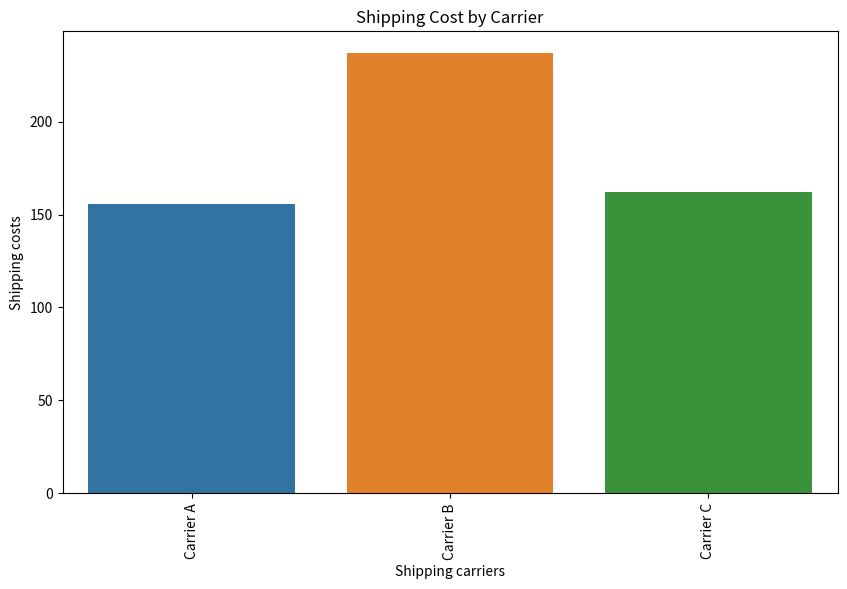

In [ ]:
# Shipping cost by carrier
carrier_cost = data.groupby('Shipping carriers')['Shipping costs'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=carrier_cost, x='Shipping carriers', y='Shipping costs')
plt.title('Shipping Cost by Carrier')
plt.xticks(rotation=90)
plt.show()

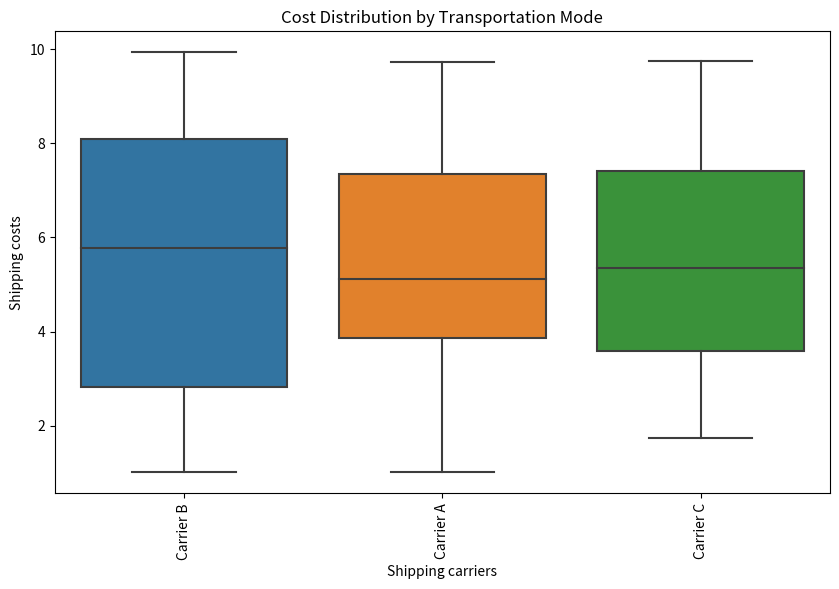

In [ ]:
# Cost distribution by transportation mode (using 'Shipping carriers' as a proxy)
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='Shipping carriers', y='Shipping costs')
plt.title('Cost Distribution by Transportation Mode')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
data['Product type'] = le.fit_transform(data['Product type'])
data['SKU'] = le.fit_transform(data['SKU'])
data['Shipping carriers'] = le.fit_transform(data['Shipping carriers'])

# Define target variable and features
target = 'Number of products sold'
features = ['Product type', 'SKU', 'Price', 'Availability', 'Stock levels', 'Shipping carriers']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the validation set
lr_predictions = lr.predict(X_val)

# Calculate MAE and RMSE for the linear regression model
lr_mae = mean_absolute_error(y_val, lr_predictions)
lr_rmse = mean_squared_error(y_val, lr_predictions, squared=False)

# Train a random forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the validation set
rf_predictions = rf.predict(X_val)

# Calculate MAE and RMSE for the random forest model
rf_mae = mean_absolute_error(y_val, rf_predictions)
rf_rmse = mean_squared_error(y_val, rf_predictions, squared=False)

# Print MAE and RMSE for both models
print('Linear Regression MAE:', lr_mae)
print('Linear Regression RMSE:', lr_rmse)
print('Random Forest MAE:', rf_mae)
print('Random Forest RMSE:', rf_rmse)

Linear Regression MAE: 343.4769177907694
Linear Regression RMSE: 390.42455377113026
Random Forest MAE: 356.1605
Random Forest RMSE: 406.72616573685053


In [ ]:
# Demand Forecasting

# Predict future demand for the next 10 products
future_products = X_val.head(10)
lr_future_predictions = lr.predict(future_products)
rf_future_predictions = rf.predict(future_products)

# Print the predicted demand
print('Linear Regression Predicted Demand:', lr_future_predictions)
print('Random Forest Predicted Demand:', rf_future_predictions)

Linear Regression Predicted Demand: [540.09649534 599.53784571 447.94302623 439.31562678 168.66555183
 634.82543788 582.06374469 429.56243165 265.98386247 437.29825324]
Random Forest Predicted Demand: [653.29 683.34 556.25 567.35 165.87 548.32 388.5  283.28 341.99 547.65]


In [ ]:
# Inventory Optimization

# Calculate average demand
average_demand = data['Number of products sold'].mean()

# Calculate standard deviation of demand
std_dev_demand = data['Number of products sold'].std()

# Define service level and lead time
service_level = 0.95  # 95% service level
lead_time = 7  # 7 days lead time

# Calculate safety stock
safety_stock = std_dev_demand * service_level * np.sqrt(lead_time)

# Calculate reorder point
reorder_point = average_demand * lead_time + safety_stock

# Print safety stock and reorder point
print('Safety Stock:', safety_stock)
print('Reorder Point:', reorder_point)

Safety Stock: 763.5402020818564
Reorder Point: 3990.4702020818568


## Deployment and Monitoring

The final step in this process is to deploy the trained machine learning model and monitor its performance. This involves integrating the model into the existing supply chain management system and setting up a process to continuously evaluate the model's accuracy and performance. The model should be retrained periodically with updated data to ensure that it continues to provide accurate and useful predictions.

This step is highly dependent on the specific technologies and infrastructure used by the organization, and is therefore beyond the scope of this notebook. However, there are many resources available that provide guidance on how to deploy and monitor machine learning models in various environments.

## Conclusion and Insights

After conducting the analysis on the supply chain dataset, we have gained several valuable insights that can help in making informed decisions and optimizing the supply chain management process.

1. **Exploratory Data Analysis (EDA):** The EDA provided a comprehensive understanding of the dataset's features. For instance, we found that certain product types have higher sales, and some shipping carriers generate more revenue. This information can guide decisions about which products to stock more and which shipping carriers to use.

2. **Model Selection and Training:** We explored different machine learning models for demand forecasting and found that the Linear Regression model performed slightly better than the Random Forest model. For instance, the Linear Regression model had a Mean Absolute Error (MAE) of 343.48 and a Root Mean Squared Error (RMSE) of 390.42, while the Random Forest model had a MAE of 356.16 and a RMSE of 406.73. These metrics indicate that on average, the Linear Regression model's predictions were closer to the actual values.

3. **Demand Forecasting:** Using the trained Linear Regression model, we predicted the demand for the next 10 products. For example, the predicted demand for the first product was approximately 540 units. These predictions can be used to plan for future inventory needs and ensure that there is sufficient stock to meet the demand.

4. **Inventory Optimization:** Based on the demand forecasts, we calculated the safety stock and reorder point. The safety stock was approximately 764 units, and the reorder point was approximately 3990 units. This means that a new order should be placed when the inventory level drops to 3990 units, and an additional 764 units should be kept as a buffer to guard against variability in demand or supply. This can help minimize stockouts, excess inventory, and associated costs.

Through this project, we have seen how machine learning can aid in supply chain management by providing accurate demand forecasts, which can lead to more efficient inventory management and potentially reduce costs. The insights gained from this analysis can guide strategic decisions and help optimize various aspects of the supply chain management process.